In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os 

%matplotlib inline

In [9]:
M = [1E0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5]
W = [1., 10., 50., 100.]
K = [1E3, 1E4, 2E4]
Xi = [0.5, 1.0, 1.5]

In [10]:
Data = pd.DataFrame(columns=['M', 'W', 'K', 'Xi', 'MeanLoss', 'VSeed'], dtype=np.float64)

for m in M:
    for w in W:
        for k in K:
            for xi in Xi:
                for n in range(10):
                    pth = "../log/Harmonic_Piezo_TrussNe:8/m:{}/k:{}/omega:{}/xi:{}/gamma:0.0001/C:1e-07/W_seed:0/G_seed:0/C_seed:0/V_seed:{}/lr:1000000000.0/Vr:10/Vi:1/Ep:20000/Vm:0.0/A:1e-06/angle:0/".format(m, k, w, xi, n)
                    if os.path.exists(pth):
                        pth += os.listdir(pth)[0] + '/'
                        data = np.load(pth + 'loss.npz')['loss']
                        Data = pd.concat([Data, pd.DataFrame([[m, w, k, xi, data[-1000:].mean(), n]], columns=['M', 'W', 'K', 'Xi', 'MeanLoss', 'VSeed'])])
                    else:
                        # print(pth)
                        pass

In [11]:
display(Data)

,M,W,K,Xi,MeanLoss,VSeed
0,1.00000,1.0,1000.0,0.5,2.574043e-13,0.0
0,1.00000,1.0,1000.0,1.0,2.668892e-13,0.0
0,1.00000,1.0,1000.0,1.5,2.657559e-13,0.0
0,1.00000,1.0,10000.0,0.5,4.016874e-09,0.0
0,1.00000,1.0,10000.0,1.0,4.039812e-09,0.0
...,...,...,...,...,...,...
0,0.00001,100.0,10000.0,1.0,4.016133e-09,0.0
0,0.00001,100.0,10000.0,1.5,4.019697e-09,0.0
0,0.00001,100.0,20000.0,0.5,5.760006e-05,0.0
0,0.00001,100.0,20000.0,1.0,5.760692e-05,0.0


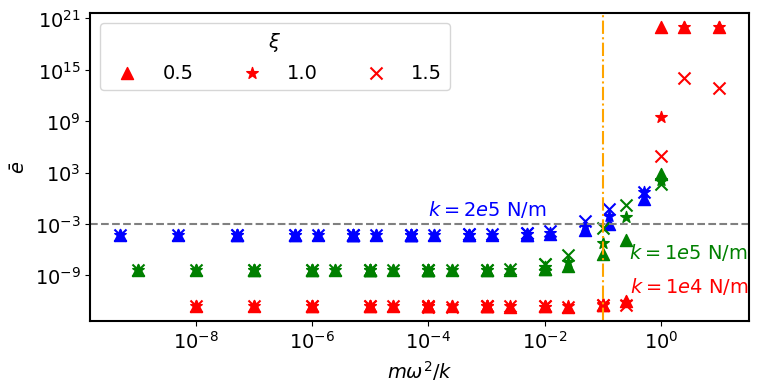

In [26]:
# get each row of data
Num = 10000
plt.figure(figsize=(8.5,4))
plt.xlabel(r'$m\omega^2/k$')
plt.ylabel(r'$\bar{e}$')
mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally
mpl.rcParams['font.size'] = 14
plt.yscale('log') 
plt.xscale('log')
marker = {'0.5':'^', '1.0':'*', '1.5':'x'}
color = {'1000.0':'r', '10000.0':'g', '20000.0':'b'}
# 
th = 1E20

for row in Data.iterrows():
    m, w, k, xi = row[1]['M'], row[1]['W'], row[1]['K'], row[1]['Xi']
    lss = row[1]['MeanLoss']
    if lss > th: lss = th
    plt.scatter((m*w**2)/k, lss, c=color[str(k)] , s=75, marker=marker[str(xi)], ) 
    if Num == 0: break
    Num -= 1
# Add legend manually for different markers
plt.legend(['0.5', '1.0', '1.5'], title=r'$\xi$', ncol=3)
plt.axhline(y=1E-3, color='grey', linestyle='--')
plt.axvline(x=1E-1, color='orange', linestyle='-.')
plt.text(1E-4, 1E-2, r'$k=2e5$ N/m', fontsize=14, color='b')
plt.text(2.8E-1, 1E-7, r'$k=1e5$ N/m', fontsize=14, color='g')
plt.text(2.9E-1, 1E-11, r'$k=1e4$ N/m', fontsize=14, color='r')
plt.show()
# Add colorbar manually for different colors
# plt.colorbar(ticks=[1000, 10000, 20000], label=r'$\omega$', orientation='horizontal', pad=0.2)
